# Modusa Quick Guide

# Loader

**modusa** can now load the following file formats:

| **Category**   | **Supported Formats**                                |
|----------------|------------------------------------------------------|
| 🪶 **Audio**   | WAV · MP3 · M4A · OPUS · FLAC · AIFF · AAC |
| 🖼️ **Image**   | PNG · JPG                                        |
| 🏷️ **Annotation** | TXT *(Audacity Label)* · CTM *(ASR Outputs)* · TEXTGRID *(Praat Label)* |

In [ ]:
import modusa as ms
import numpy as np

# Loading audio
audio: ms.audio = ms.load.audio("../../../datasets/mydata/bilaval_aaroh_avroh.wav", sr=16000)
y, sr, title = audio.data[0], audio.sr, audio.title
print(y.shape, sr, title, "\n========")

# Loading annotation
ann = ms.load.audacity_label("../../../datasets/mydata/bilaval_aaroh_avroh-labels.txt")
ann = ann.trim(0, 10) # trim to match the timestamps in case the audio was also trimmed 
print(ann)

(268980,) 16000 bilaval_aaroh_avroh 
Annotation([
  (1.077264, 1.951923, sa, None, None)
  (2.095229, 2.925414, re, None, None)
  (2.999538, 3.874197, ga, None, None)
  (3.973028, 4.734031, ma, None, None)
  (4.990993, 5.677873, pa, None, None)
  (5.836003, 6.616772, dha, None, None)
  (6.799611, 7.545789, ni, None, None)
  (7.684153, 8.484689, sa, None, None)
  (8.642819, 9.403822, sa, None, None)
])


# Audio Player


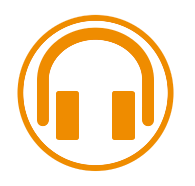

In [6]:
ms.play.audio(y[:int(2*sr)], sr, label=" ".join([word for s, e, word, _, _ in ann])) # Removing the audio

# Audio Recorder

In [7]:
rec = ms.record.mic()

In [ ]:
y, sr, title = rec() # Once you are done recording, you can load the recorded content

# Visualizer

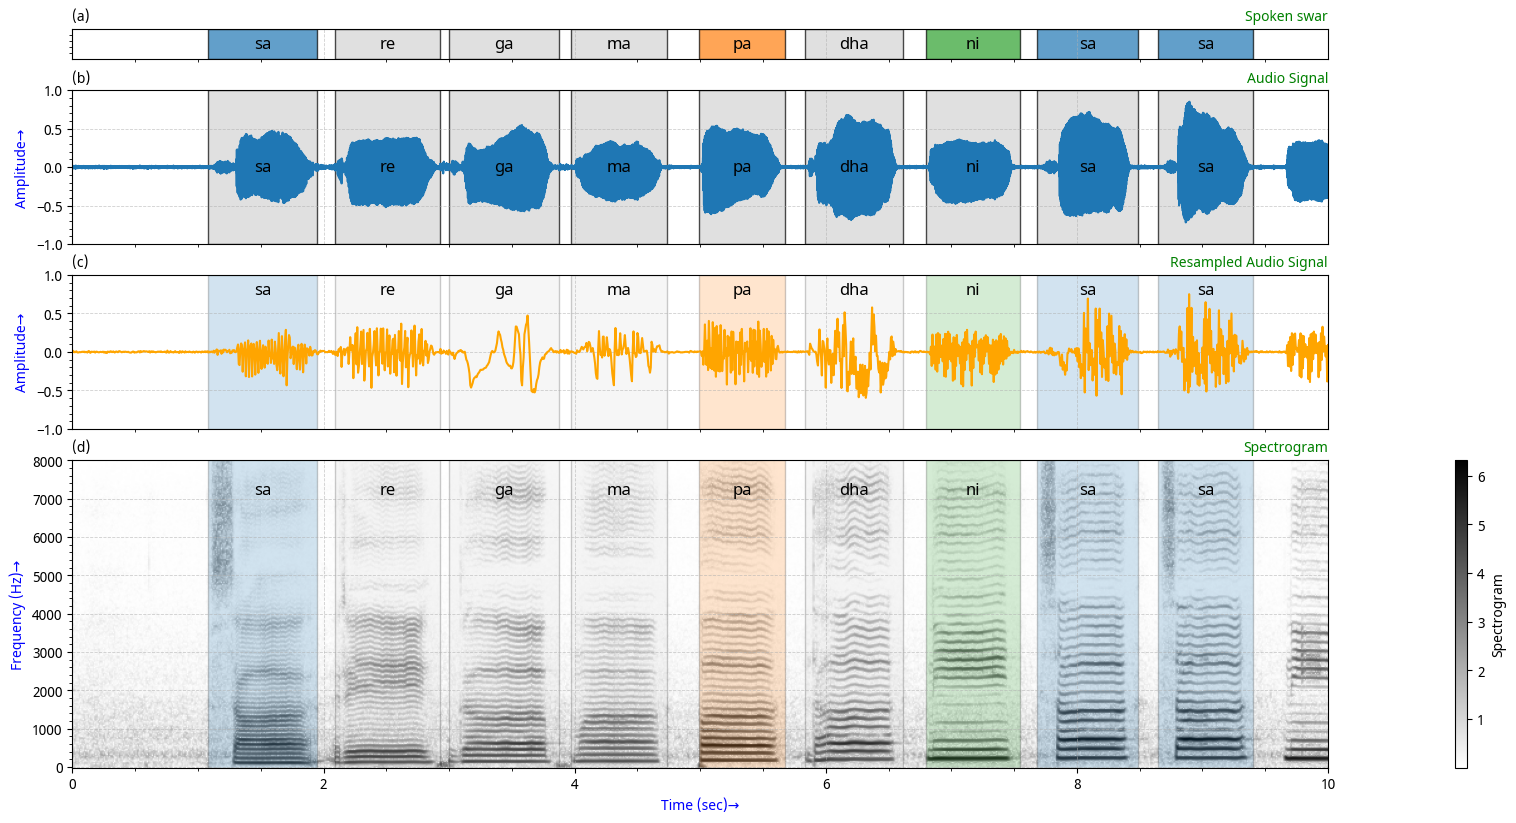

In [8]:
# An example
fig, axs = ms.figlayouts.tracks(
    config="assm",
    xlim=(0, 10),
    ylims=[None, (-1, 1), (-1, 1), None],
    titles=["Spoken swar", "Audio Signal", "Resampled Audio Signal", "Spectrogram"],
    xlabels=[None, None, None, "Time (sec)"],
    ylabels=[None, "Amplitude", "Amplitude", "Frequency (Hz)"]
)

# Plot
ms.paint.annotation(axs[0, 0], ann.group(["sa", "pa", "ni"])) # To color group different labels
ms.paint.signal(axs[1, 0], y, np.arange(y.size) / sr)
ms.paint.annotation(axs[1, 0], ann) # annotation can also be plotted on any other tier but make sure to change the ylim for the annotation

ms.paint.signal(axs[2, 0], y[::100], np.arange(y[::100].size) * (100 / sr), c="orange")
ms.paint.annotation(axs[2, 0], ann.group(["sa", "pa", "ni"]), text_loc="top", alpha=0.2) # Top

ms.paint.image(axs[3, 0], *ms.extract.stft(y, sr, 512, 160, 10), clabel="Spectrogram", o="lower", c="gray_r", cax=axs[3, 1])
ms.paint.annotation(axs[3, 0], ann.group(["sa", "pa", "ni"]), text_loc="top", alpha=0.2) # Bottom

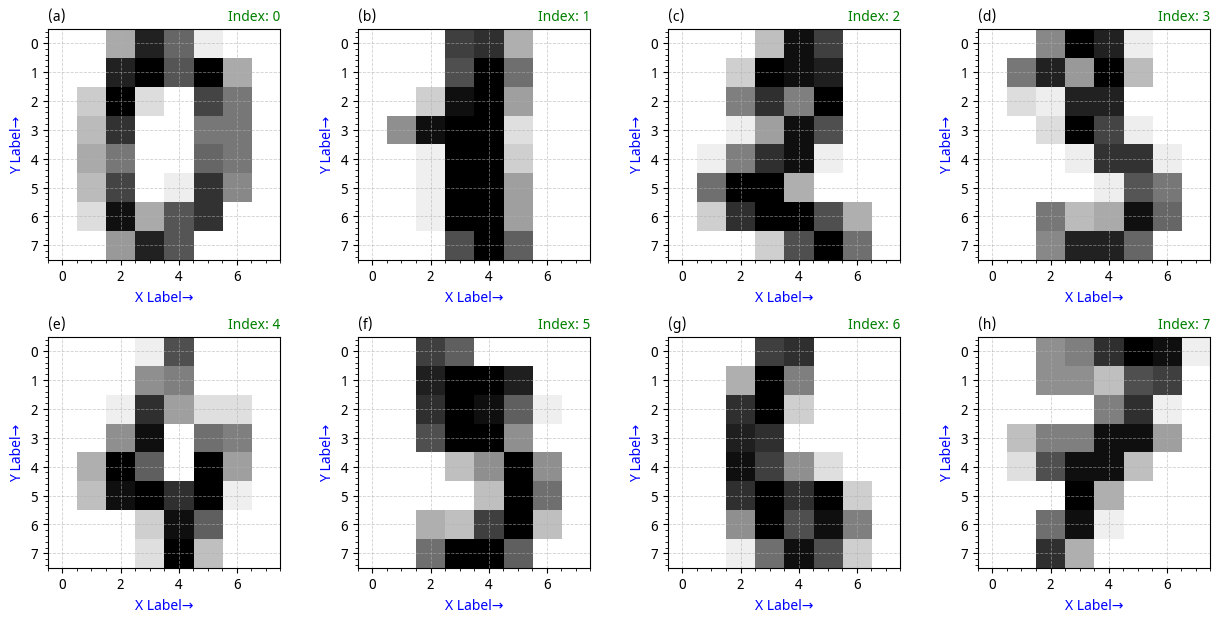

In [9]:
# Load and visualize digits dataset
from sklearn.datasets import load_digits
digits = load_digits()
images = digits.images
labels = digits.target

fig, axs = ms.figlayouts.collage(
    config=(2, 4),
    xlabels=["X Label"]*8,
    ylabels=["Y Label"]*8,
    titles=["Title"]*8,
    # xlims=[(-10, 10)]*8,
    # ylims=[(-10, 10)]*8,
)

for i, ax in enumerate(np.ravel(axs)):
    ms.set.title(ax, title=f"Index: {i}")
    ms.paint.image(ax, images[i])

# Animator

modusa provides an easy-to-use **animation** context manager to create animation for the canvas in the presets.


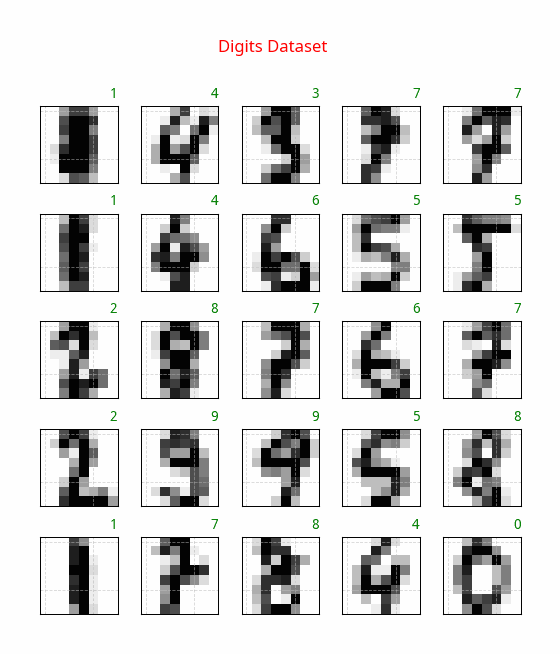

In [10]:
from sklearn.datasets import load_digits

# Load dataset
digits = load_digits()
images = digits.images
labels = digits.target

# Animation setup
with ms.animate("./tmp/digits.gif", fps=1) as anim:
    for frame in range(10):
        # Create a 5×5 layout (collage)
        fig, axs = ms.figlayouts.collage((5, 5), size=1, hspace_inches=0.4, wspace_inches=0.3, abc=False, remove_ticks=True)
        ms.set.figtitle(fig, f"Digits Dataset", y=0.98)

        random_idxs = np.random.choice(len(images), size=axs.size, replace=False)
        
        # Plot each random digit
        for ax, idx in zip(np.ravel(axs), random_idxs):
            ms.paint.image(ax, images[idx])
            ms.set.title(ax, str(labels[idx]))
        
        anim.snapshot(fig)

# Annotator

In [40]:
with ms.interact() as interact:

    # An example
    fig, axs = ms.figlayouts.tracks(
        config="as",
        xlim=(0, 10),
        titles=["Spoken swar", "Audio Signal", "Resampled Audio Signal", "Spectrogram"],
        xlabels=[None, None, None, "Time (sec)"],
        ylabels=[None, "Amplitude", "Amplitude", "Frequency (Hz)"]
    )
    
    # Plot
    ms.paint.annotation(axs[0, 0], ann.group(["sa", "pa", "ni"])) # To color group different labels
    ms.paint.signal(axs[1, 0], y, np.arange(y.size) / sr)
    ms.paint.annotation(axs[1, 0], ann) # annotation can also be plotted on any other tier but make sure to change the ylim for the annotation

    ann = interact.annotate(fig, axs)

✅ Interactive mode enabled (`%matplotlib widget`).


# Distribution Plot

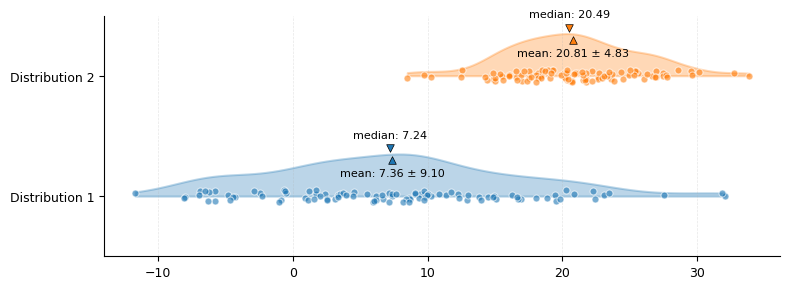

In [11]:
dist1 = np.random.normal(10, 10, 100)
dist2 = np.random.normal(20, 5, 100)

ms.hill_plot(dist1, dist2, labels=["Distribution 1", "Distribution 2"])